# INTRODUCTION
This dataset is taken from the UCI machine learning repository. 
The goal is to find whether the adult makes more than 50000 US dollars in an year on the basis of the feautures given in the dataset.


# 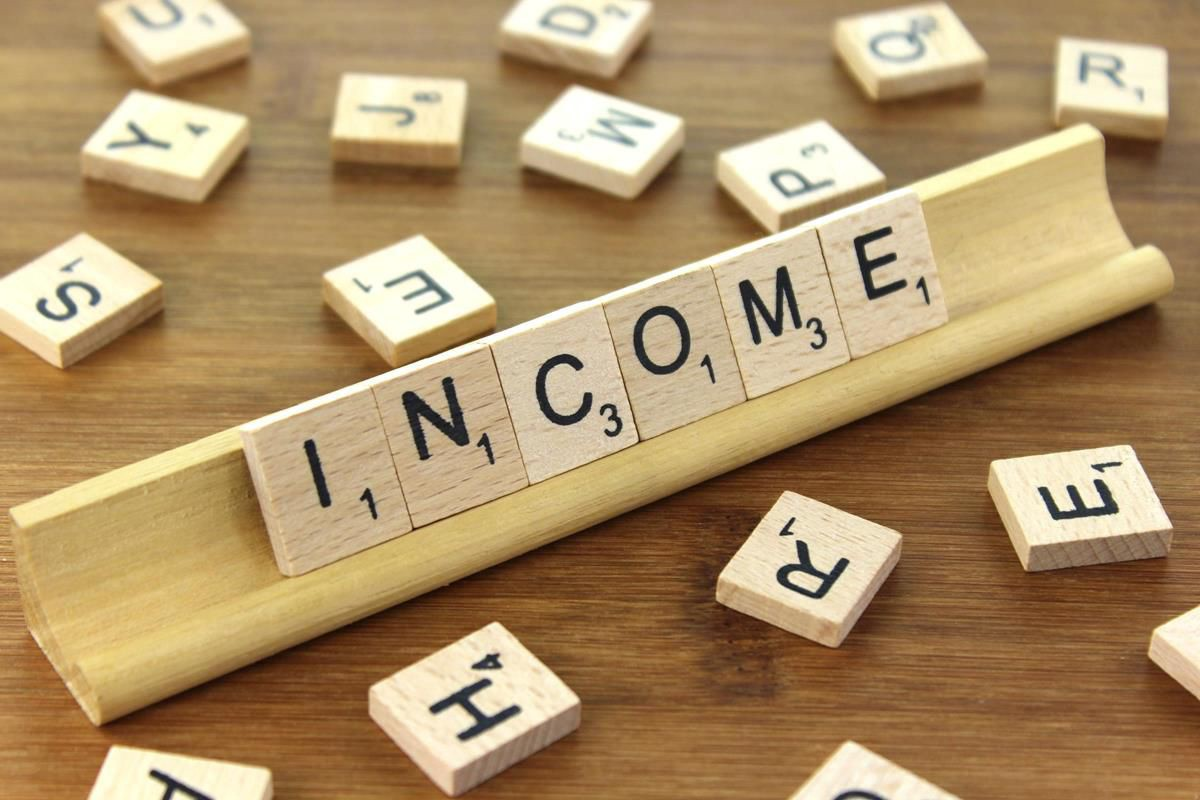

# In this problem, we have 'Income' as the Target variable. we see that we have only two values which are to be predicted, either the income is greater than 50K, which is Yes, or the income is less than or equal to 50K, which is No. We will label encode the target variable.

# Importing basic libraries  to proceed 



In [1]:
#Importing libaries basic Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,10)
%matplotlib inline 
###########################################
# To ignore the unwanted Warnings
import warnings 
warnings.filterwarnings('ignore')
###########################################

In [2]:
#data load
ds = pd.read_csv('adult.csv')

# Exploratory Data Analysis

In [3]:
ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
ds.shape

(32561, 15)

# Dataset has 32561 rows and 15 columns.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# There are 8 object type feautures rest of the features are of integer type.

In [6]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
numerical_columns = ds.describe().columns

In [8]:
numerical_columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [9]:
ds[numerical_columns]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


# Now i have separated numeric columns and categorical columns for better understanding.

In [10]:
categorical_columns = list(set(ds.columns.difference(numerical_columns)))

In [11]:
categorical_columns

['income',
 'occupation',
 'marital.status',
 'native.country',
 'sex',
 'relationship',
 'workclass',
 'education',
 'race']

In [12]:
ds[categorical_columns]

,income,occupation,marital.status,native.country,sex,relationship,workclass,education,race
0,<=50K,?,Widowed,United-States,Female,Not-in-family,?,HS-grad,White
1,<=50K,Exec-managerial,Widowed,United-States,Female,Not-in-family,Private,HS-grad,White
2,<=50K,?,Widowed,United-States,Female,Unmarried,?,Some-college,Black
3,<=50K,Machine-op-inspct,Divorced,United-States,Female,Unmarried,Private,7th-8th,White
4,<=50K,Prof-specialty,Separated,United-States,Female,Own-child,Private,Some-college,White
...,...,...,...,...,...,...,...,...,...
32556,<=50K,Protective-serv,Never-married,United-States,Male,Not-in-family,Private,Some-college,White
32557,<=50K,Tech-support,Married-civ-spouse,United-States,Female,Wife,Private,Assoc-acdm,White
32558,>50K,Machine-op-inspct,Married-civ-spouse,United-States,Male,Husband,Private,HS-grad,White
32559,<=50K,Adm-clerical,Widowed,United-States,Female,Unmarried,Private,HS-grad,White


In [13]:
ds.rename(columns={"fnlwgt":'Final Weight',"education.num":'education_num',"marital.status":"marital_status","capital.gain":"capital_gain","capital.loss":
                  "capital_loss","hours.per.week":"hours_per_week","native.country":'native_country'},inplace=True)

In [14]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# I have renamed the columns for better understanding.

# Handling Missing Values

In [15]:
ds.isnull().sum() 

age               0
workclass         0
Final Weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# There is no missing value present in this dataset.

In [16]:
ds

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# We see that the dataset consists of no null values. But for some features, we have '?' as the values present.  

In [17]:
ds=ds.replace("?",np.nan) 

# We will be considered this '?' as null values. 

In [18]:
ds.isnull().sum()

age                  0
workclass         1836
Final Weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [19]:
ds.shape

(32561, 15)

In [20]:
1836/32561

0.05638647461687295

In [21]:
#work class : 1836/32561 less than 25%

In [22]:
ds

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Now using 'mode' we fill null values with mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column.

In [23]:
for i in ["occupation","workclass","native_country"]:
    ds[i].fillna(ds[i].mode()[0],inplace=True)

In [24]:
ds.isnull().sum()

age               0
workclass         0
Final Weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# AGE

In [25]:

def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

ds['age_group'] = ds['age'].apply(age_group)

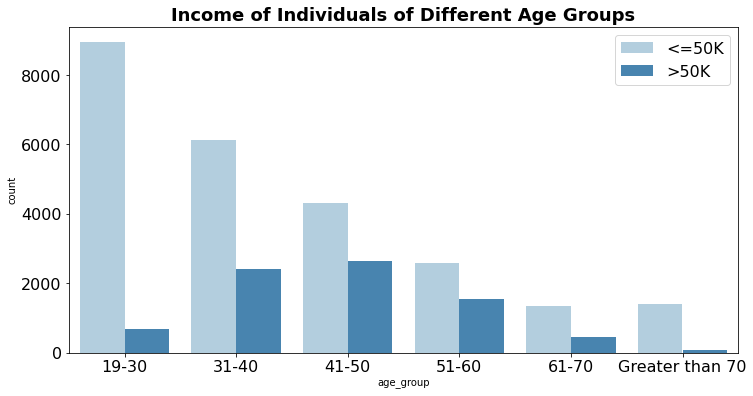

In [26]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(ds['age_group'], hue = ds['income'], palette='Blues', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# WORKCLASS

<AxesSubplot:>

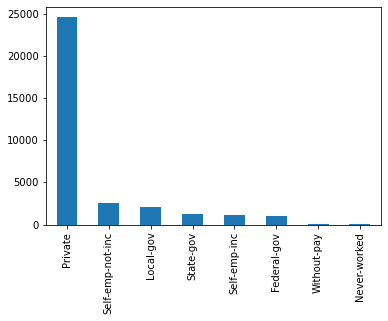

In [27]:
ds['workclass'].value_counts().plot(kind='bar')

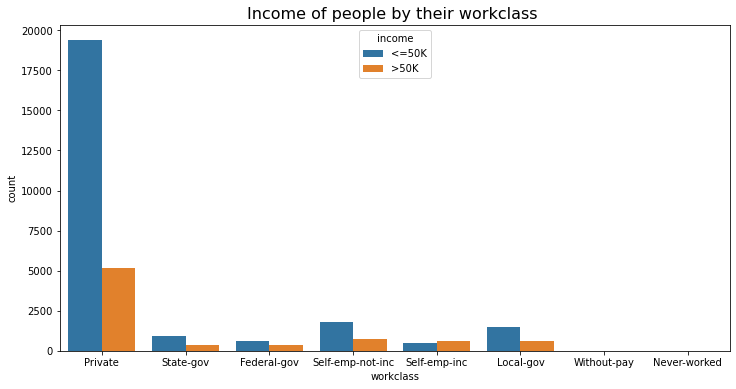

In [28]:
plt.figure(figsize=(12,6))
plt.title("Income of people by their workclass ", fontsize = 16)
sns.countplot(x = ds['workclass'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [29]:
work_class = pd.get_dummies(ds['workclass'],drop_first=True)

In [30]:
work_class

,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,1,0,0,0,0
32559,0,0,1,0,0,0,0


In [31]:
ds=pd.concat((ds,work_class),1)

In [32]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,age_group,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,United-States,<=50K,Greater than 70,0,0,1,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,United-States,<=50K,Greater than 70,0,0,1,0,0,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,United-States,<=50K,61-70,0,0,1,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,United-States,<=50K,51-60,0,0,1,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,United-States,<=50K,41-50,0,0,1,0,0,0,0


# EDUCATION

<AxesSubplot:>

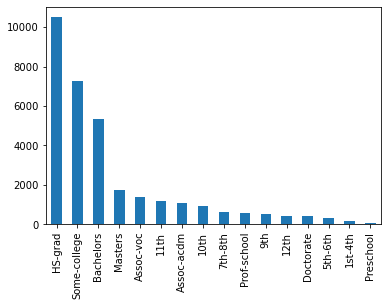

In [33]:
ds['education'].value_counts().plot(kind='bar')

In [34]:
ds["education_num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [35]:
ds[["education", "education_num"]].head(15)

,education,education_num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


In [36]:
ds["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

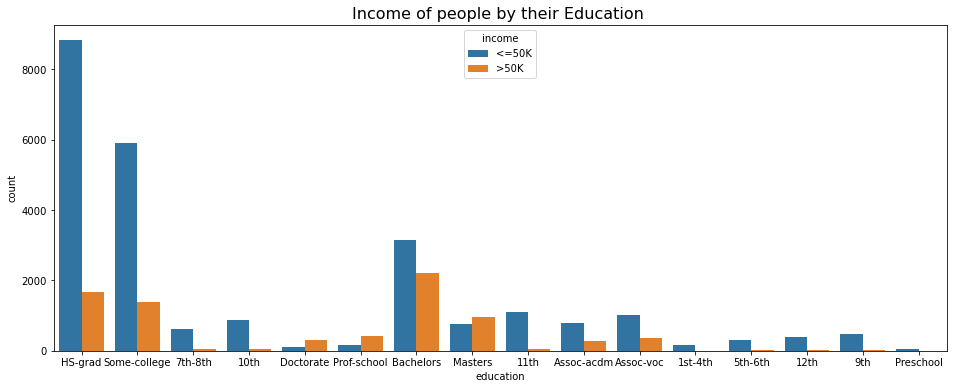

In [37]:
plt.figure(figsize=(16,6))
plt.title("Income of people by their Education ", fontsize = 16)
sns.countplot(x = ds['education'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [38]:
Education = pd.get_dummies(ds['education'],drop_first=True)

In [39]:
Education

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32557,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
ds=pd.concat((ds,Education),1)

In [41]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,1,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,1,0,0,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,0,0,0,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,0,0,1


# MARITAL STATUS

<AxesSubplot:>

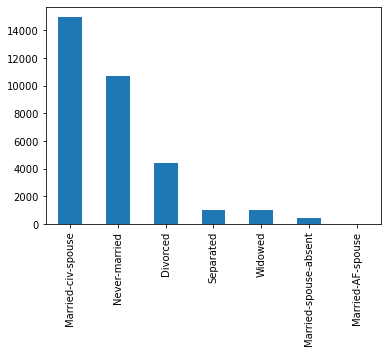

In [42]:
ds['marital_status'].value_counts().plot(kind='bar')

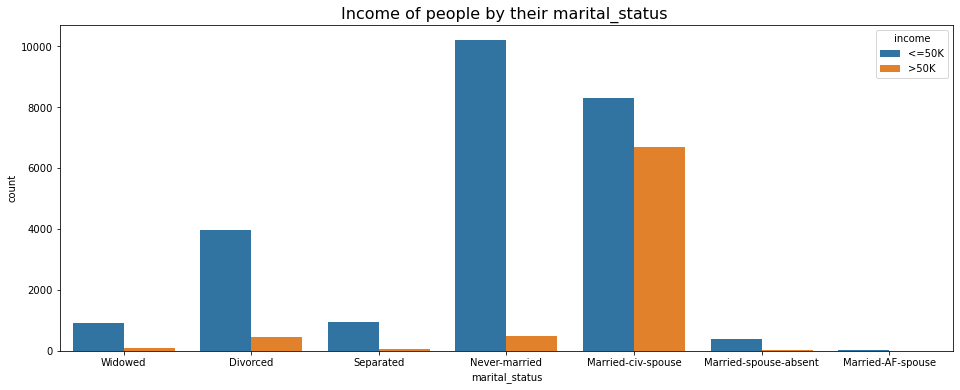

In [43]:
plt.figure(figsize=(16,6))
plt.title("Income of people by their marital_status ", fontsize = 16)
sns.countplot(x = ds['marital_status'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [44]:
marital_status = pd.get_dummies(ds['marital_status'],drop_first=True)

In [45]:
marital_status

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
32556,0,0,0,1,0,0
32557,0,1,0,0,0,0
32558,0,1,0,0,0,0
32559,0,0,0,0,0,1


In [46]:
ds = pd.concat((ds,marital_status),1)

In [47]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,0,0,0,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,0,0,1
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,1,0,0,0,0,0,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,1,0,0,0,0,1,0


# OCCUPATION

<AxesSubplot:>

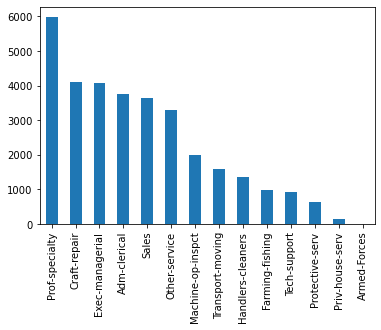

In [48]:
ds['occupation'].value_counts().plot(kind='bar')


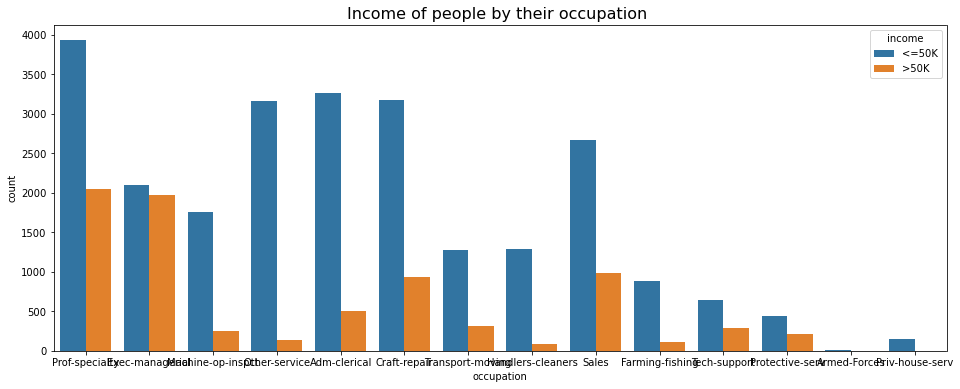

In [49]:
plt.figure(figsize=(16,6))
plt.title("Income of people by their occupation ", fontsize = 16)
sns.countplot(x = ds['occupation'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [50]:
ds['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [51]:
occupation = pd.get_dummies(ds['occupation'],drop_first=True)

In [52]:
occupation

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,1,0
32558,0,0,0,0,0,1,0,0,0,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,0,0,0


# RELATIONSHIP

<AxesSubplot:>

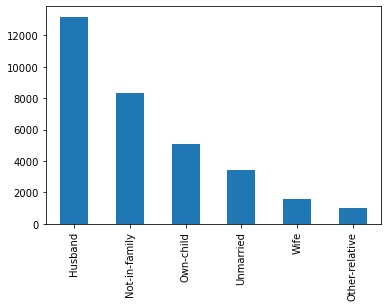

In [53]:
ds['relationship'].value_counts().plot(kind='bar')

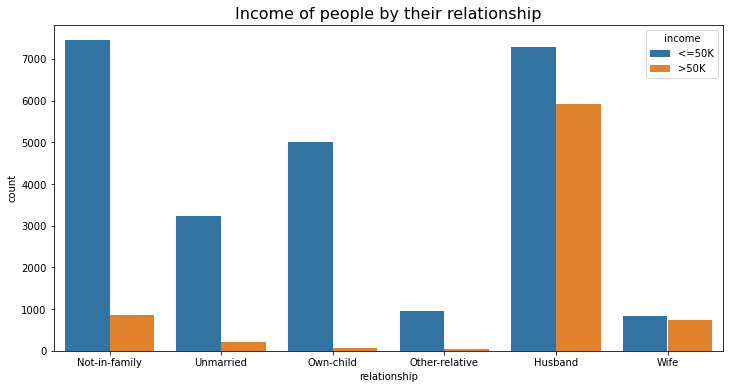

In [54]:
plt.figure(figsize=(12,6))
plt.title("Income of people by their relationship", fontsize = 16)
sns.countplot(x = ds['relationship'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [55]:
ds['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [56]:
relation_ship = pd.get_dummies(ds['relationship'],drop_first=True)

In [57]:
relation_ship

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
32556,1,0,0,0,0
32557,0,0,0,0,1
32558,0,0,0,0,0
32559,0,0,0,1,0


In [58]:
ds = pd.concat((ds,relation_ship),1)

In [59]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,1,1,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,1,1,0,0,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,1,0,0,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,1,0,0,0,1,0,0


# RACE

<AxesSubplot:>

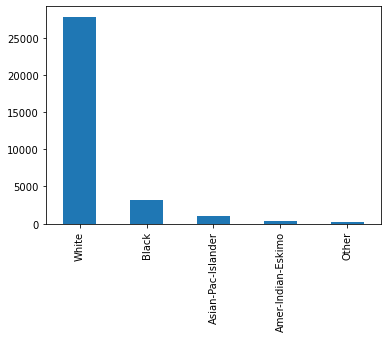

In [60]:
ds['race'].value_counts().plot(kind='bar')

In [61]:
ds["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

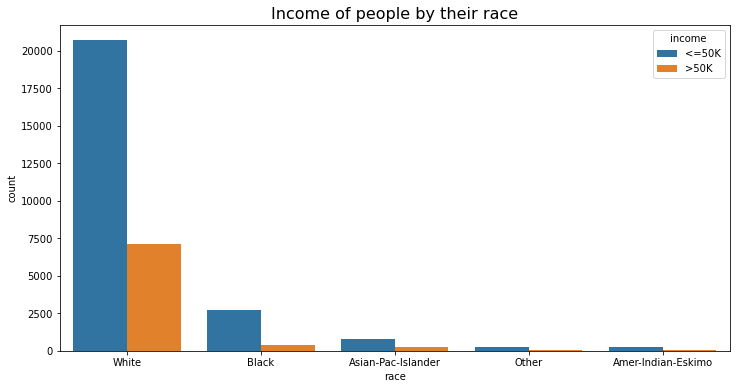

In [62]:
plt.figure(figsize=(12,6))
plt.title("Income of people by their race", fontsize = 16)
sns.countplot(x = ds['race'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [63]:
ds['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [64]:
race = pd.get_dummies(ds['race'],drop_first=1)

In [65]:
race

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
32556,0,0,0,1
32557,0,0,0,1
32558,0,0,0,1
32559,0,0,0,1


In [66]:
ds = pd.concat((ds,race),1)

In [67]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,1,1,0,0,0,0,0,0,0,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,1,1,0,0,0,0,0,0,0,1
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,1,0,0,0,1,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,1,0,0,0,0,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,1,0,0,0,0,0,1


# sex

<AxesSubplot:>

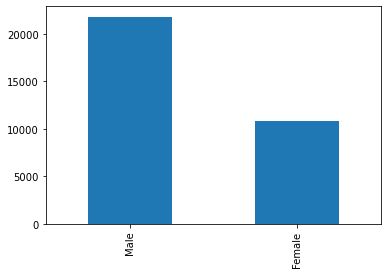

In [68]:
ds['sex'].value_counts().plot(kind='bar')

In [69]:
ds.columns

Index(['age', 'workclass', 'Final Weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_group', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White'],
      dtype='object')

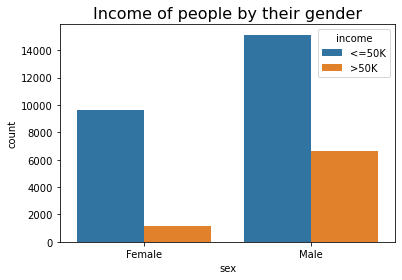

In [70]:
plt.title("Income of people by their gender", fontsize = 16)
sns.countplot(x = ds['sex'], hue = ds['income'])
plt.show()

# lets proceed with one hot encoding

In [71]:
sex = pd.get_dummies(ds['sex'],drop_first=1)

In [72]:
sex

,Male
0,0
1,0
2,0
3,0
4,0
...,...
32556,1
32557,0
32558,1
32559,0


In [73]:
ds = pd.concat((ds,sex),1)

In [74]:
ds.columns

Index(['age', 'workclass', 'Final Weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_group', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male'],
      dtype='object')

In [75]:
ds.columns = ['sex' if x=='Male' else x for x in ds.columns]

In [76]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,sex
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,1,0,0,0,0,0,0,0,1,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,1,0,0,0,0,0,0,0,1,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,1,0,0,1,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,1,0,0,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,1,0,0,0,0,0,1,0


# CAPITAL GAIN & LOSS

In [77]:
ds[["capital_gain", "capital_loss"]].head(15)

,capital_gain,capital_loss
0,0,4356
1,0,4356
2,0,4356
3,0,3900
4,0,3900
5,0,3770
6,0,3770
7,0,3683
8,0,3683
9,0,3004


# NATIVE_COUNTRY

In [78]:
ds['native_country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [79]:
len(ds['native_country'].unique())

41

In [80]:
ds['native_country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

<AxesSubplot:>

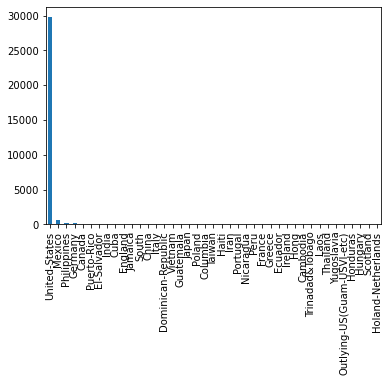

In [81]:
ds['native_country'].value_counts().plot(kind='bar')

# lets proceed with one hot encoding

In [82]:
ds['native_country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [83]:
native_county = pd.get_dummies(ds['native_country'],drop_first=True)

In [84]:
native_county

,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
ds = pd.concat((ds,native_county),axis=1)

In [86]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [87]:
list(ds.columns)

['age',
 'workclass',
 'Final Weight',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'age_group',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Preschool',
 'Prof-school',
 'Some-college',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 'White',
 'sex',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hu

# INCOME

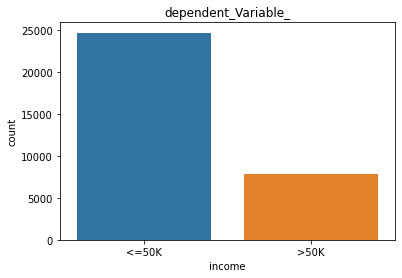

In [88]:
sns.countplot(x='income',data=ds)
plt.title('dependent_Variable_')
plt.show()

# Income is our target variable Seeing this visualization the dataset is highly imbalanced. There is less than 25% of >50K income category while more than 75% of <=50K income.

# checking Imbalance data in the dataset

In [89]:
ds['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [90]:
income = pd.get_dummies(ds['income'])

In [91]:
income

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32556,1,0
32557,1,0
32558,0,1
32559,1,0


In [92]:
ds = ds.drop(('income'),axis=1)

In [93]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [94]:
ds = pd.concat((ds,income),axis=1)

In [95]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,<=50K,>50K
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,1,0,0,1,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,1,0,0,1,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,1,0,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,1,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,1,0,0,1,0


In [96]:
ds.columns

Index(['age', 'workclass', 'Final Weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'age_group', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'sex', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Hondu

In [97]:
ds = ds.drop(('<=50K'),axis=1)

In [98]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,>50K
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,1,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,1,0,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,1,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,1,0,0,0


In [99]:
ds.columns = ['Target' if x=='>50K' else x for x in ds.columns]

In [100]:
ds.head()

,age,workclass,Final Weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Target
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,...,0,0,0,0,0,0,1,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,1,0,0,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,...,0,0,0,0,0,0,1,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,1,0,0,0


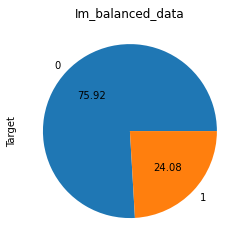

In [101]:
ds['Target'].value_counts().plot.pie(title='Im_balanced_data',autopct='%.2f');

#  Before we move into treating the imbalance data lets proceed with one hot encoding 

In [102]:
ds.columns

Index(['age', 'workclass', 'Final Weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'age_group', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'sex', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Holand-Netherlands', 'Hondu

In [103]:
ds.shape

(32561, 94)

# Lets drop the un wanted columns including the columns which were created to explore the data

In [104]:
ds = ds.drop(['workclass','education','marital_status','sex','occupation','relationship','race','native_country','age_group'],axis=1)

In [105]:
ds.head()

,age,Final Weight,education_num,capital_gain,capital_loss,hours_per_week,Local-gov,Never-worked,Private,Self-emp-inc,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Target
0,90,77053,9,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
ds.columns

Index(['age', 'Final Weight', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador',
       'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala',
       'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(G

In [107]:
ds['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [108]:
# 24720*2

#  Lets split the data into x and y 

In [109]:
x = ds.drop(('Target'),1)
y = ds['Target']

In [110]:
x.columns

Index(['age', 'Final Weight', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador',
       'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala',
       'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(G

In [111]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: Target, Length: 32561, dtype: uint8

# As we can see that we now have a  un balanced dataset, so Lets proceed with the imblearn package to sort out this problem 


In [112]:
! pip install imblearn

In [113]:
from imblearn.over_sampling import RandomOverSampler

In [114]:
random = RandomOverSampler()

In [115]:
x_resamp , y_resamp = random.fit_resample(x,y)

In [116]:
24720*2

49440

In [117]:
print(x_resamp.shape)
print(y_resamp.shape)

(49440, 83)
(49440,)


In [118]:
print(y_resamp.value_counts())

0    24720
1    24720
Name: Target, dtype: int64


# Target class before Balancing

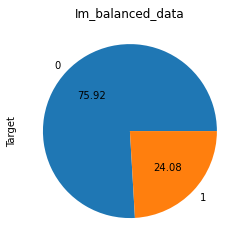

In [119]:
ds['Target'].value_counts().plot.pie(title='Im_balanced_data',autopct='%.2f');

# Target class after Balancing 

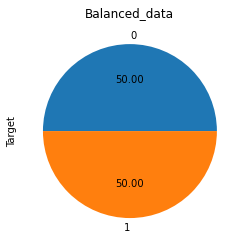

In [120]:
y_resamp.value_counts().plot.pie(title='Balanced_data',autopct='%.2f');

In [121]:
ds.head()

,age,Final Weight,education_num,capital_gain,capital_loss,hours_per_week,Local-gov,Never-worked,Private,Self-emp-inc,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Target
0,90,77053,9,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Splitting into train and test


In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resamp, y_resamp, test_size=0.25, random_state=0)
# test_size 0.3(30%) train_size 0.7(70%).....ideal train 75% and test 25%

# MODEL 1: Logistic Regression 

In [123]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(random_state=0)
Log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [124]:
# Lets Import the metrics for our classification model 

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,f1_score,classification_report


In [126]:
train_predictions_log = Log.predict(x_train)
test_prediction_log = Log.predict(x_test)
#test_predictions=Log.predict(y_test)

In [127]:
# Train_predicition on logistic regression 
print('accuracy_score',accuracy_score(train_predictions_log,y_train))
print('F1_score',f1_score(train_predictions_log,y_train))
print('confusion_matrix\n',confusion_matrix(train_predictions_log,y_train))     

accuracy_score 0.614428263214671
F1_score 0.5805240149047913
confusion_matrix
 [[12890  8630]
 [ 5667  9893]]


In [128]:
# Test_Prediction on Logistic Regression 
print('accuracy_score',accuracy_score(test_prediction_log,y_test))
print('F1_Score',f1_score(test_prediction_log,y_test))
print('confusion_matrix\n',confusion_matrix(test_prediction_log,y_test))

accuracy_score 0.6205501618122977
F1_Score 0.5898915704791885
confusion_matrix
 [[4297 2824]
 [1866 3373]]


In [129]:
#printing the classification Report

In [130]:
print('classification report_train\n',classification_report(train_predictions_log,y_train))

classification report_train
               precision    recall  f1-score   support

           0       0.69      0.60      0.64     21520
           1       0.53      0.64      0.58     15560

    accuracy                           0.61     37080
   macro avg       0.61      0.62      0.61     37080
weighted avg       0.63      0.61      0.62     37080



In [131]:
print('classification report_test\n',classification_report(test_prediction_log,y_test))

classification report_test
               precision    recall  f1-score   support

           0       0.70      0.60      0.65      7121
           1       0.54      0.64      0.59      5239

    accuracy                           0.62     12360
   macro avg       0.62      0.62      0.62     12360
weighted avg       0.63      0.62      0.62     12360



In [132]:
#predicting probability

In [133]:
y_train_pred = Log.predict_proba(x_train)
y_test_pred = Log.predict_proba(x_test)

In [134]:
print('Train_probability',roc_auc_score(y_train,y_train_pred[:,1]))
print('Test_probability',roc_auc_score(y_test,y_test_pred[:,1]))

Train_probability 0.6702612451270115
Test_probability 0.679704834854507


In [135]:
#lets plot the AUC and ROC curve

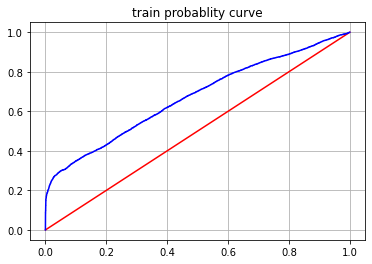

In [136]:
fpr,tpr, threshold = roc_curve(y_train,y_train_pred[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,color='b')
plt.grid(True)
plt.gray()
plt.title('train probablity curve')
plt.show()

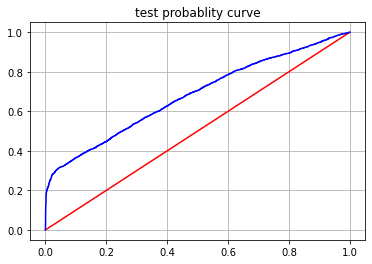

In [137]:
fpr,tpr, threshold = roc_curve(y_test,y_test_pred[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,color='b')
plt.grid(True)
plt.gray()
plt.title('test probablity curve')
plt.show()

# MODEL 2: RANDOM FOREST

In [138]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [139]:
#Create a Gaussian Classifier
clf=RandomForestClassifier()#(n_estimators=100)


In [140]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [141]:
y_pred_dt_train = clf.predict(x_train)
y_pred_dt_test = clf.predict(x_test)

In [142]:
# Train Scores 

In [143]:
print('accuracy_score',accuracy_score(y_pred_dt_train,y_train))
print('F1_score',f1_score(y_pred_dt_train,y_train))
print('confusion_matrix\n',confusion_matrix(y_pred_dt_train,y_train))  

accuracy_score 0.999730312837109
F1_score 0.9997301236033896
confusion_matrix
 [[18548     1]
 [    9 18522]]


In [144]:
# Test Scores 

In [145]:
print('accuracy_score',accuracy_score(y_pred_dt_test,y_test))
print('F1_score',f1_score(y_pred_dt_test,y_test))
print('Confusion_matrix\n',confusion_matrix(y_pred_dt_test,y_test))

accuracy_score 0.920631067961165
F1_score 0.9246254321936227
Confusion_matrix
 [[5362  180]
 [ 801 6017]]


In [146]:
print('classification report_train\n',classification_report(y_pred_dt_train,y_train))

classification report_train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18549
           1       1.00      1.00      1.00     18531

    accuracy                           1.00     37080
   macro avg       1.00      1.00      1.00     37080
weighted avg       1.00      1.00      1.00     37080



In [147]:
print('classification report_test\n',classification_report(y_pred_dt_test,y_test))

classification report_test
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      5542
           1       0.97      0.88      0.92      6818

    accuracy                           0.92     12360
   macro avg       0.92      0.93      0.92     12360
weighted avg       0.93      0.92      0.92     12360



# MODEL 3: GRADIENT BOOSTING CLASSIFIER 

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
GBC=GradientBoostingClassifier()

In [150]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [151]:
y_train_gc=GBC.predict(x_train)
y_test_gc=GBC.predict(x_test)

In [152]:
# train_metrics 

In [153]:
print('accuracy_score',accuracy_score(y_train_gc,y_train))
print('F1_score',f1_score(y_train_gc,y_train))
print('confusion_matrix\n',confusion_matrix(y_train_gc,y_train))

accuracy_score 0.8413430420711974
F1_score 0.8471987740578166
confusion_matrix
 [[14888  2214]
 [ 3669 16309]]


In [154]:
# test_metrics 

In [155]:
print('accuracy_score',accuracy_score(y_test_gc,y_test))
print('F1_score',f1_score(y_test_gc,y_test))
print('confusion_matrix\n',confusion_matrix(y_test_gc,y_test))

accuracy_score 0.8338187702265372
F1_score 0.8395563193251053
confusion_matrix
 [[4932  823]
 [1231 5374]]


In [156]:
print('classification report_train\n',classification_report(y_train_gc,y_train))

classification report_train
               precision    recall  f1-score   support

           0       0.80      0.87      0.84     17102
           1       0.88      0.82      0.85     19978

    accuracy                           0.84     37080
   macro avg       0.84      0.84      0.84     37080
weighted avg       0.84      0.84      0.84     37080



In [157]:
print('classification report_test\n',classification_report(y_test,y_test_gc))

classification report_test
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      6163
           1       0.81      0.87      0.84      6197

    accuracy                           0.83     12360
   macro avg       0.84      0.83      0.83     12360
weighted avg       0.84      0.83      0.83     12360



# MODEL 4: DECISION TREE CLASSIFIER

In [158]:
from sklearn.tree import DecisionTreeClassifier 

In [159]:
clf = DecisionTreeClassifier()

In [160]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [161]:
y_dc_train = clf.predict(x_train)
y_dc_test = clf.predict(x_test)

In [162]:
# Train_score 

In [163]:
print('accuracy_score',accuracy_score(y_dc_train,y_train))
print('F1_score',f1_score(y_dc_train,y_train))
print('confusion_matrix\n',confusion_matrix(y_dc_train,y_train))  

accuracy_score 0.999730312837109
F1_score 0.9997300944669366
confusion_matrix
 [[18550     3]
 [    7 18520]]


In [164]:
print('accuracy_Score',accuracy_score(y_dc_test,y_test))
print('F1_score',f1_score(y_dc_test,y_test))
print('confusion_matrix\n',confusion_matrix(y_dc_test,y_test))

accuracy_Score 0.9096278317152103
F1_score 0.9146350783339702
confusion_matrix
 [[5259  213]
 [ 904 5984]]


In [165]:
print('classification report_train\n',classification_report(y_dc_train,y_train))

classification report_train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18553
           1       1.00      1.00      1.00     18527

    accuracy                           1.00     37080
   macro avg       1.00      1.00      1.00     37080
weighted avg       1.00      1.00      1.00     37080



In [166]:
print('classification report_test\n',classification_report(y_test,y_dc_test))

classification report_test
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      6163
           1       0.87      0.97      0.91      6197

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360



# Conclusion

In this Capstone project it was been the great learning experience for me. Here I have taken "Adult census income prediction" 
the ask was whether the adult makes more than 50000 US dollars in an year on the basis 
of the feautures given in the dataset.In this problem, we have 'Income' as the Target variable. 
we see that we have only two values which are to be predicted, either the income is greater than 50K, which is Yes,
or the income is less than or equal to 50K,which is No.
the most frequently used algorithm like Logistic regression, Random Forest, Decision Tree and gradient boosting classifier.
Before that, I have done EDA part and i fount some missing values in the dataset as well. We will label encode the target variable,
"Income" is our target variable Seeing visualization the dataset is highly imbalanced.
There is less than 25% of >50K income category while more than 75% of <=50K income.
An unbalanced data split in the dependent class I used imblearn algorithm to knock
Down the unbalanced data problem and also i did one hot encoding. And gave the pretty decent Score.
gradient boosting classifier, random forest, decision tree model gave better accuracy comparing to logestic regression.
